## MOVIE RATING PREDICTION

### Step 1: Import all standard library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Step 2: Load the Dataset

In [2]:
data = pd.read_csv('IMDb Movies India.csv',encoding='ISO-8859-1')
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
data.shape

(15509, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


### Step 3:  Data Cleaning Process

In [5]:
# drop unnecessary column
data = data.drop(['Actor 2','Actor 3'], axis=1)
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor


In [6]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
dtype: int64

In [7]:
data.isnull().sum()/len(data)*100

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
dtype: float64

In [8]:
data.drop_duplicates()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor
...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN


In [9]:
data['Year']= data['Year'].str.replace(r'[()]','',regex=True)
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
2,#Homecoming,2021,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
4,...And Once Again,2010,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor


In [10]:
data['Duration']= data['Duration'].str.replace(r'min','',regex=True)
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
2,#Homecoming,2021,90,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
4,...And Once Again,2010,105,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor


In [11]:
data['Votes'].unique()

array([nan, '8', '35', ..., '70,344', '408', '1,496'], dtype=object)

In [12]:
data['Votes']= data['Votes'].str.replace(r',','',regex=True)
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
2,#Homecoming,2021,90,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
4,...And Once Again,2010,105,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor


In [13]:
data['Genre'].value_counts()

Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: Genre, Length: 485, dtype: int64

In [14]:
# fillna with Drama in Genre column

data['Genre']= data['Genre'].fillna('Drama')
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre          0
Rating      7590
Votes       7589
Director     525
Actor 1     1617
dtype: int64

In [15]:
data['Year']= data['Year'].fillna(data['Year'].mode()[0])
data.isnull().sum()

Name           0
Year           0
Duration    8269
Genre          0
Rating      7590
Votes       7589
Director     525
Actor 1     1617
dtype: int64

In [16]:
data['Duration']= data['Duration'].fillna(data['Duration'].mode()[0])
data['Rating']= data['Rating'].fillna(data['Rating'].mean())
data['Votes']= data['Votes'].fillna(data['Votes'].mode()[0])
data['Director']= data['Director'].fillna(data['Director'].mode()[0])
data['Actor 1']= data['Actor 1'].fillna(data['Actor 1'].mode()[0])

In [17]:
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
dtype: int64

In [18]:
data.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
dtype: object

In [19]:
data['Duration']= data['Duration'].astype(float)

In [20]:
data['Year']= data['Year'].astype(int)

In [21]:
data['Votes']= data['Votes'].str.replace(r'M','',regex=True)

In [22]:
data['Votes']= data['Votes'].str.replace(r'$','',regex=True)

In [23]:
data['Votes']= data['Votes'].astype(str).astype(float)

In [24]:
data.dtypes

Name         object
Year          int32
Duration    float64
Genre        object
Rating      float64
Votes       float64
Director     object
Actor 1      object
dtype: object

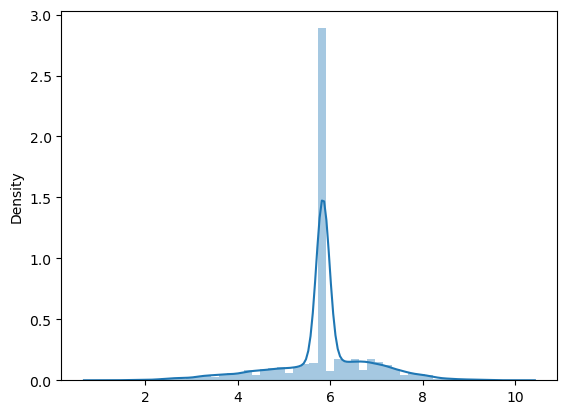

In [25]:
sns.distplot(x=data['Rating'])
plt.show()

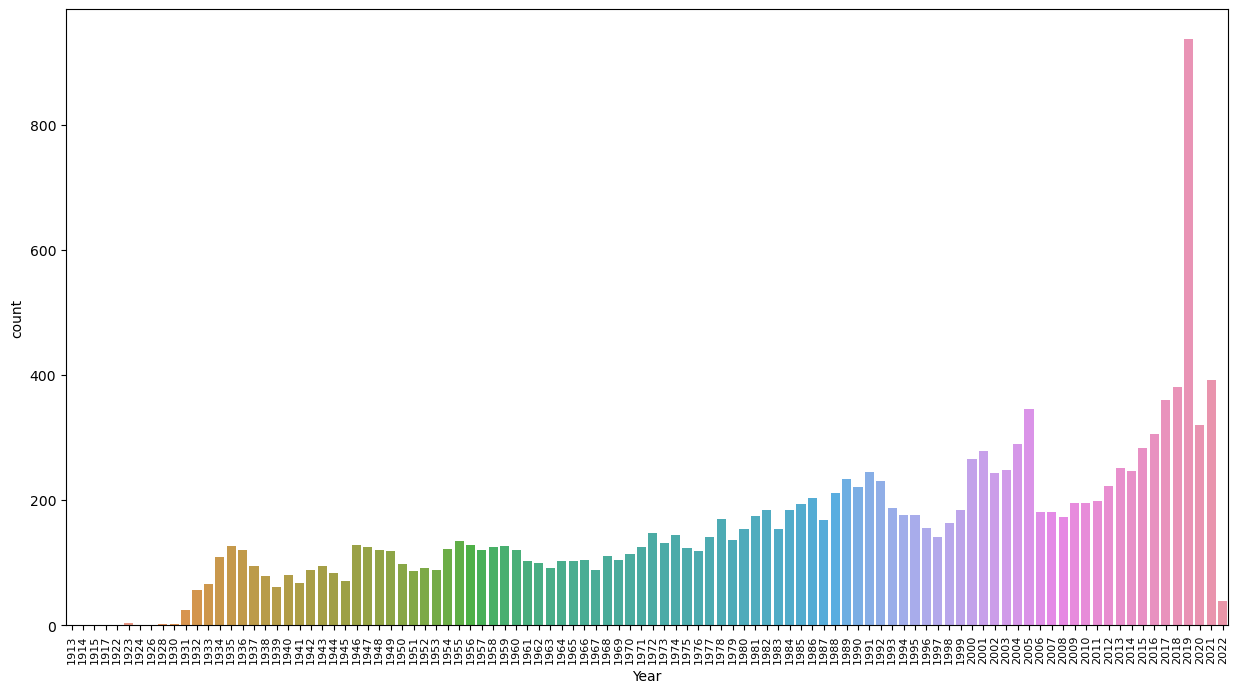

In [26]:
plt.figure(figsize=(15,8))
sns.countplot(x=data['Year'])
plt.xticks(rotation='vertical', fontsize=8)
plt.show()

<AxesSubplot:>

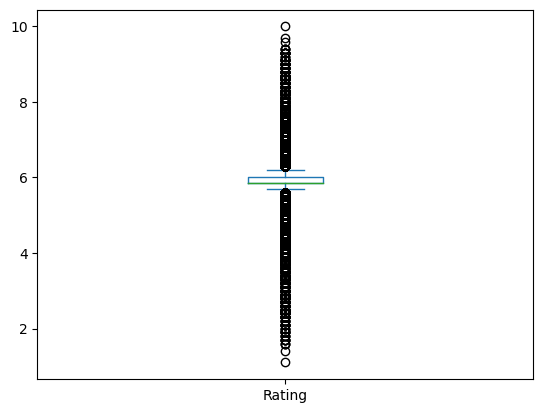

In [27]:
data['Rating'].plot(kind='box')

In [28]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
0,,2019,120.0,Drama,5.841621,8.0,J.S. Randhawa,Manmauji
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.000000,8.0,Gaurav Bakshi,Rasika Dugal
2,#Homecoming,2021,90.0,"Drama, Musical",5.841621,8.0,Soumyajit Majumdar,Sayani Gupta
3,#Yaaram,2019,110.0,"Comedy, Romance",4.400000,35.0,Ovais Khan,Prateik
4,...And Once Again,2010,105.0,Drama,5.841621,8.0,Amol Palekar,Rajat Kapoor


In [29]:
data= data.drop('Name',axis=1)
data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1
0,2019,120.0,Drama,5.841621,8.0,J.S. Randhawa,Manmauji
1,2019,109.0,Drama,7.000000,8.0,Gaurav Bakshi,Rasika Dugal
2,2021,90.0,"Drama, Musical",5.841621,8.0,Soumyajit Majumdar,Sayani Gupta
3,2019,110.0,"Comedy, Romance",4.400000,35.0,Ovais Khan,Prateik
4,2010,105.0,Drama,5.841621,8.0,Amol Palekar,Rajat Kapoor


In [30]:
data['Director'].unique()

array(['J.S. Randhawa', 'Gaurav Bakshi', 'Soumyajit Majumdar', ...,
       'Mozez Singh', 'Ved Prakash', 'Kiran Thej'], dtype=object)

In [31]:
data['Actor 1'].unique()

array(['Manmauji', 'Rasika Dugal', 'Sayani Gupta', ..., 'Meghan Jadhav',
       'Roohi Berde', 'Sangeeta Tiwari'], dtype=object)

<AxesSubplot:>

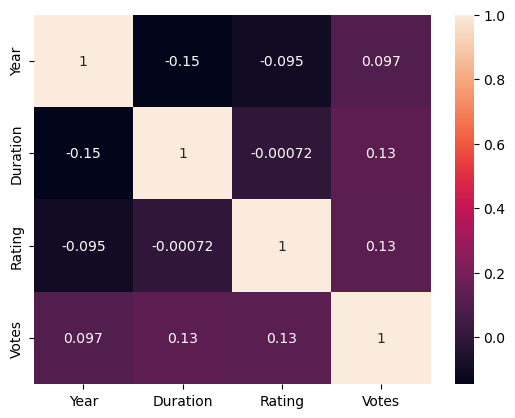

In [32]:
sns.heatmap(data.corr(),annot=True)

### Apply Feature Scaling and Feature Encoding

In [33]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms

MinMaxScaler()

In [34]:
data[['Duration','Rating','Votes']]= mms.fit_transform(data[['Duration','Rating','Votes']])
data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1
0,2019,0.369906,Drama,0.532766,0.000005,J.S. Randhawa,Manmauji
1,2019,0.335423,Drama,0.662921,0.000005,Gaurav Bakshi,Rasika Dugal
2,2021,0.275862,"Drama, Musical",0.532766,0.000005,Soumyajit Majumdar,Sayani Gupta
3,2019,0.338558,"Comedy, Romance",0.370787,0.000051,Ovais Khan,Prateik
4,2010,0.322884,Drama,0.532766,0.000005,Amol Palekar,Rajat Kapoor


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le

LabelEncoder()

In [36]:
data['Director'] = le.fit_transform(data['Director'])

In [37]:
data['Actor 1'] = le.fit_transform(data['Actor 1'])

In [38]:
data['Genre'] = le.fit_transform(data['Genre'])
data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1
0,2019,0.369906,299,0.532766,0.000005,1926,2250
1,2019,0.335423,299,0.662921,0.000005,1548,3280
2,2021,0.275862,351,0.532766,0.000005,5123,3713
3,2019,0.338558,228,0.370787,0.000051,3319,2917
4,2010,0.322884,299,0.532766,0.000005,385,3112


## Apply ML algorithm on Dataset

#### separate x and y

- Here Rating is target variable so we apply regression algorithm

In [39]:
x= data.drop('Rating',axis=1)
y= data['Rating']

#### split the dataset into train and test set

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [64]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [65]:
lr.fit(x_train,y_train)

LinearRegression()

#### Perform prediction

In [66]:
y_pred = lr.predict(x_test)
y_pred

array([0.52611403, 0.50544614, 0.52983171, ..., 0.53078373, 0.5328998 ,
       0.54853759])

#### Evaluations

In [67]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)
accuracy

0.04339333837900183

In [68]:
0.04339333837900183*100

4.339333837900183

In [70]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x,y,cv=5)

array([0.04482626, 0.04623459, 0.00313494, 0.03210444, 0.02974954])

- highest accuracy is 4.48%

In [ ]:
### Try to apply another algoritm

In [71]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor()
dtc

DecisionTreeRegressor()

In [72]:
dtc.fit(x_train,y_train)
dtc

DecisionTreeRegressor()

In [73]:
y_pred_dtc = lr.predict(x_test)
y_pred_dtc

array([0.52611403, 0.50544614, 0.52983171, ..., 0.53078373, 0.5328998 ,
       0.54853759])

In [74]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred_dtc)
accuracy

0.04339333837900183

- we got same accuracy